# 1.对目标函数进行优化

In [12]:
import numpy as np
from scipy.optimize import minimize

def rosen(x):   #定义目标函数
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

### 雅可比矩阵

In [13]:
def rosen_der(x):
    #jacbion矩阵（导数矩阵）
    #注意返回值是个数组!!!!而且尺寸要和初值x0一致
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

### Hession矩阵

In [14]:
def rosen_hess(x):
    #hessian矩阵
    #返回对象是个二维数组
    x = np.asarray(x)
    H = np.diag(-400*x[:-1],1) - np.diag(400*x[:-1],-1)
    diagonal = np.zeros_like(x)
    diagonal[0] = 1200*x[0]**2-400*x[1]+2
    diagonal[-1] = 200
    diagonal[1:-1] = 202 + 1200*x[1:-1]**2 - 400*x[2:]
    H = H + np.diag(diagonal)
    return H

## 最小化计算

In [16]:
x0 = np.array([1.0, 0.9, 0.8, 0.7, 0.6])
res = minimize(rosen, x0, method='Newton-CG',
               jac=rosen_der, hess=rosen_hess,
               options={'xtol': 1e-8, 'disp': True})
res.x

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 31
         Gradient evaluations: 55
         Hessian evaluations: 25


array([1.        , 1.        , 1.        , 0.99999999, 0.99999999])

# 2.常微分方程求解

In [17]:
from sympy import *
f = symbols('f', cls=Function)
x = symbols('x')
eq = Eq(f(x).diff(x) + f(x) + f(x)*f(x), 0)
print(dsolve(eq, f(x))) #

Eq(f(x), -C1/(C1 - exp(x)))


In [18]:
from sympy import *
f = symbols('f', cls=Function)
x = symbols('x')
eq = Eq(f(x).diff(x,1)+f(x)+f(x)**2, 0)
print(dsolve(eq, f(x)))  #计算f(x)

C1 = symbols('C1')
eqr = -C1/(C1 - exp(x))   #设置f(x),计算C1，为常数
eqr1 = eqr.subs(x, 0)
print(solveset(eqr1 - 1, C1))
#eqr2 = eqr.subs(C1, 1/2)


Eq(f(x), -C1/(C1 - exp(x)))
FiniteSet(1/2)


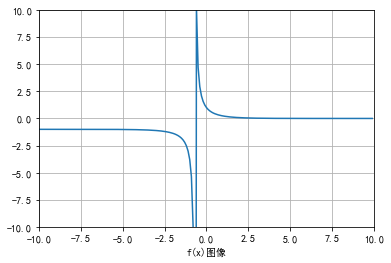

In [19]:
# 画图
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["font.sans-serif"]=['SimHei']#用来正常显示中文标签  
plt.rcParams["axes.unicode_minus"]=False#用来正常显示负号  
x_1 = np.arange(-10, 10, 0.1)
y_1 = [-0.5/(0.5 - exp(x)) for x in x_1]
plt.plot(x_1, y_1)
plt.axis([-10,10,-10,10])
plt.grid()
plt.xlabel('f(x)图像')
plt.show()